# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** ALIFIO NOERIFANZA
- **Email:** ALIFIONSZ@GMAIL.COM
- **ID Dicoding:** alifio noerifanza

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
 "Apa efek keadaan cuaca terhadap naik turunnya pelanggan?"
- Pertanyaan 2
 "Apa efek hari kerja/libur terhadap naik turunnya pelanggan?"

## Import Semua Packages/Library yang Digunakan

In [2]:
#'import modules'
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Wrangling

### Gathering Data

In [3]:
#'Gathering data'
df = pd.read_csv('Data/day.csv') #import data Day
hour_df= pd.read_csv('Data/hour.csv')

**Insight:**
- Terdapat dua data yaitu data customer berdasarkan harian dan data customer berdasarkan jam

### Assessing Data

In [4]:
#'assessing data'
dupes=df.duplicated().sum()#nyari duplicate
hour_dupes=hour_df.duplicated().sum()
nan=df.isna().sum()
hour_nan=hour_df.isna().sum()
print(hour_dupes)
print(dupes) #print jumlah duplicates
print(nan)
print(hour_nan)  #print jumlah missing value

0
0
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- Kedua data relatif bersih karena tidak ada data kosong atau duplikat.

### Cleaning Data

In [5]:
#'cleaning data'
hour_df.drop_duplicates(inplace=True)
df.drop_duplicates(inplace=True)
df['dteday'] = pd.to_datetime(df['dteday']) #mengubah data tanggal jadi bisa dibaca
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
new_df = df.dropna() #menghilangkan kolom data yang kosong jika ada
hnew_df = hour_df.dropna()

hnew_df['True Temperature'] = hnew_df['temp'] * 41 #menambah data true temp (celcius)
hnew_df['True Humidity'] = hnew_df['hum'] * 100 #menambah data true humidity (persentase kelembapan)
hnew_df['Felt Temperature'] = hnew_df['atemp'] * 50 #menambah data felt temperature (celcius)
hnew_df['True Wind'] = hnew_df['windspeed'] * 67 #data kecepatan angin (Meter per detik)

new_df['True Temperature'] = new_df['temp'] * 41 #menambah data true temp (celcius)
new_df['True Humidity'] = new_df['hum'] * 100 #menambah data true humidity (persentase kelembapan)
new_df['Felt Temperature'] = new_df['atemp'] * 50 #menambah data felt temperature (celcius)
new_df['True Wind'] = new_df['windspeed'] * 67 #data kecepatan angin (Meter per detik)

**Insight:**
- Menurut file Readme, untuk mendapat nilai Temperatur, Humidity, dan Windspeed yang aktual (nominalnya dapat difahami) harus dikalikan dulu nilainya
- "	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)"

	temperature normalnya dengan satuan Celcius, kelembapan (humidity) adalah persenan, dan windspeed adalah m/s

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
#'Exploratory data analysis'
df_cuaca = new_df.loc[:, ["mnth","Felt Temperature","True Humidity", "True Wind", "weathersit" ,"casual", "registered"]] #memilih kolom temp dan cnt dan menjadikannya data frame 2 (df2)
df_weekday = new_df.loc[:, ["holiday","weekday","workingday", "casual", "registered"]]
corrcuaca= df_cuaca.corr() #mencari korelasi antar variable. semakin positif maka berbanding positif, jika negatif berbanding terbalik
corrweekday= df_weekday.corr()
described=new_df.describe()
hdescribed=hnew_df.describe()
based_cuaca= new_df.groupby(by="weathersit").max().reset_index()
df_tempdate = new_df.loc[:, ["dteday", "Felt Temperature"]].reset_index()
#untuk dataset hour
based_hday= hnew_df.loc[:, ["weekday","hr","workingday", "casual", "registered"]]
corrday= based_hday.corr()

print(described)

#"Menampilkan data di Streamlit"
st.title('DASHBOARD DATA BISNIS RENTAL SEPEDA')
 
min_date = new_df["dteday"].min()
max_date = new_df["dteday"].max()

with st.sidebar:
    st.image("https://cdn-icons-png.flaticon.com/512/5320/5320247.png",width=300,)
    
    start_date, end_date = st.date_input(
       label='Rentang Waktu',min_value=min_date,
       max_value=max_date,
       value=[min_date, max_date])
    
    main_df = new_df[(new_df["dteday"] >= str(start_date)) & 
                (new_df["dteday"] <= str(end_date))]
    hmain_df = hnew_df[(new_df["dteday"] >= str(start_date)) & 
                (hnew_df["dteday"] <= str(end_date))]
    
    text = st.text_area('Kotak Saran')
    if st.button('Kirim'):
        st.write('Saran: ', text)
        
    st.write("Bike-rent© 2024, All rights not reserved yet")
    
    





2024-11-26 10:36:58.874 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


          instant               dteday      season          yr        mnth  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836   
min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000   
25%    183.500000  2011-07-02 12:00:00    2.000000    0.000000    4.000000   
50%    366.000000  2012-01-01 00:00:00    3.000000    1.000000    7.000000   
75%    548.500000  2012-07-01 12:00:00    3.000000    1.000000   10.000000   
max    731.000000  2012-12-31 00:00:00    4.000000    1.000000   12.000000   
std    211.165812                  NaN    1.110807    0.500342    3.451913   

          holiday     weekday  workingday  weathersit        temp       atemp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.028728    2.997264    0.683995    1.395349    0.495385    0.474354   
min      0.000000    0.000000    0.000000    1.000000 

2024-11-26 10:36:59.066 
  command:

    streamlit run c:\Users\Blin_guy\anaconda3\envs\Streamlitbutgood\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-11-26 10:36:59.066 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-26 10:36:59.067 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-26 10:36:59.076 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-26 10:36:59.076 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-26 10:36:59.077 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-26 10:36:59.077 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-26 10:36:59.078 Thread 'MainThread': missing ScriptRunContext! This warning can

**Insight:**
- Dalam data harian terdapat 731 data yang terkumpul
- Dalam data per jam terdapat 17379 data yang terkumpul
- Kelembapan (Humidity) terendah adalah 0%
- Suhu terendah adalah 2.4 derajat celcius dengan suhu terasa terendah yaitu 3.9 derajat celcius
- kecepatan angin terendah adalah 1.5 m/s
- jumlah pelanggan paling rendah dalam satu hari adalah 22 orang

- jumlah pelanggan terbanyak adalah 8714
- suhu tertinggi adalah 35.3 derajat celcius dengan suhu terasa tertinggi yaitu 42 derajat celcius
- kecepatan angin tertinggi adalah 34 m/s
- Pelanggan tidak suka bersepeda pada suhu rendah dengan kelembapan dan kecepatan angin yang tinggi
- Jam-jam yang tidak disukai orang untuk bersepeda adalah dari jam 23.00 sampai jam 06.00

## Visualization & Explanatory Analysis

### Pertanyaan 1:

2024-11-26 10:36:59.111 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-26 10:36:59.112 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-26 10:36:59.113 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-26 10:36:59.114 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-26 10:36:59.115 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-26 10:36:59.116 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-26 10:36:59.116 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-26 10:36:59.117 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

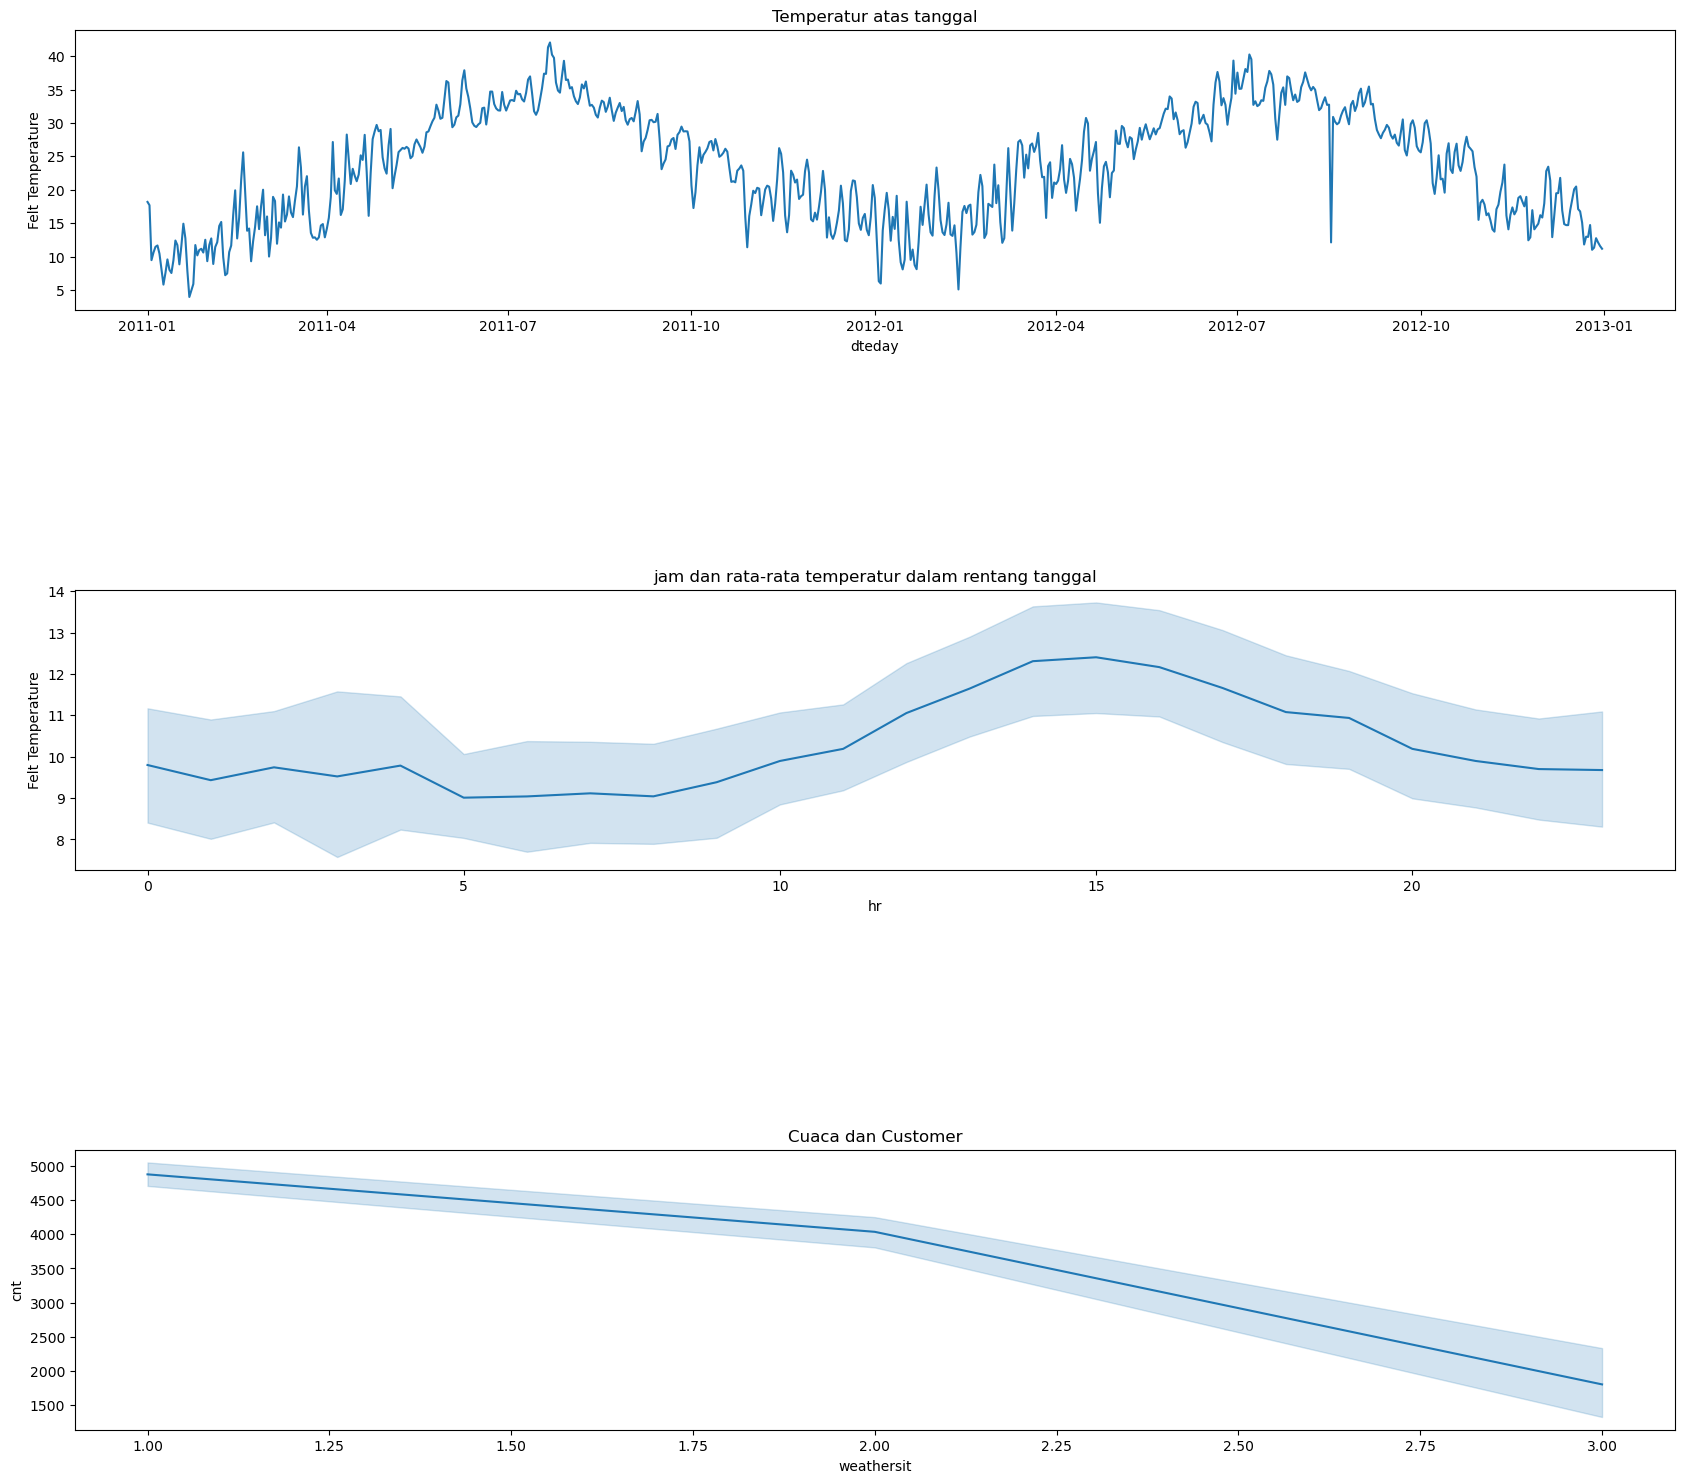

In [7]:
tab1, tab2, tab3= st.tabs(["Efek Cuaca", "Graf Perilaku pelanggan","Tabel Korelasi dan Statistik"])
 
with tab1:
    st.header("Data Cuaca")
    
    col1, col2= st.columns([4, 1])
    with col1:
        st.header("Grafik")
        #"Plot data cuaca"
        fig2, axes = plt.subplots(3, 1, figsize=(20, 20))

        sns.lineplot(x='dteday', y='Felt Temperature', ax=axes[0],data=main_df)
        axes[0].set_title('Temperatur atas tanggal')
        
        sns.lineplot(x='hr', y='Felt Temperature', ax=axes[1],data=hmain_df)
        axes[1].set_title('jam dan rata-rata temperatur dalam rentang tanggal')
        
        sns.lineplot(x='weathersit', y='cnt', ax=axes[2],data=main_df)
        axes[2].set_title("Cuaca dan Customer")
        
        plt.subplots_adjust(left=0.1,
                            bottom=0.1, 
                            right=0.9, 
                            top=0.8, 
                            wspace=0.4, 
                            hspace=1)
        st.pyplot(fig2.get_figure())
     
    with col2:
        st.header("Catatan")
        st.write("nilai weathersit: \n\n 1= cerah/berawan \n\n 2= berkabut/hujan \n\n 3=hujan besar atau badai es")
plt.show()
     

- Dapat dilihat terjadi penurunan drastis saat kondisi cuaca 3 (Hujan deras/badai es)
- Suhu paling tinggi terjadi di kisaran jan 15.00
- Suhu tinggi terjadi pada pertengahan sampai 3/4 tahun, sedangkan suhu rendah terjadi pada akhir sampai awal tahun.

### Pertanyaan 2:

2024-11-26 10:37:00.947 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-26 10:37:00.949 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-26 10:37:00.950 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-26 10:37:00.950 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-26 10:37:00.951 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-26 10:37:02.004 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-26 10:37:02.820 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-26 10:37:02.821 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

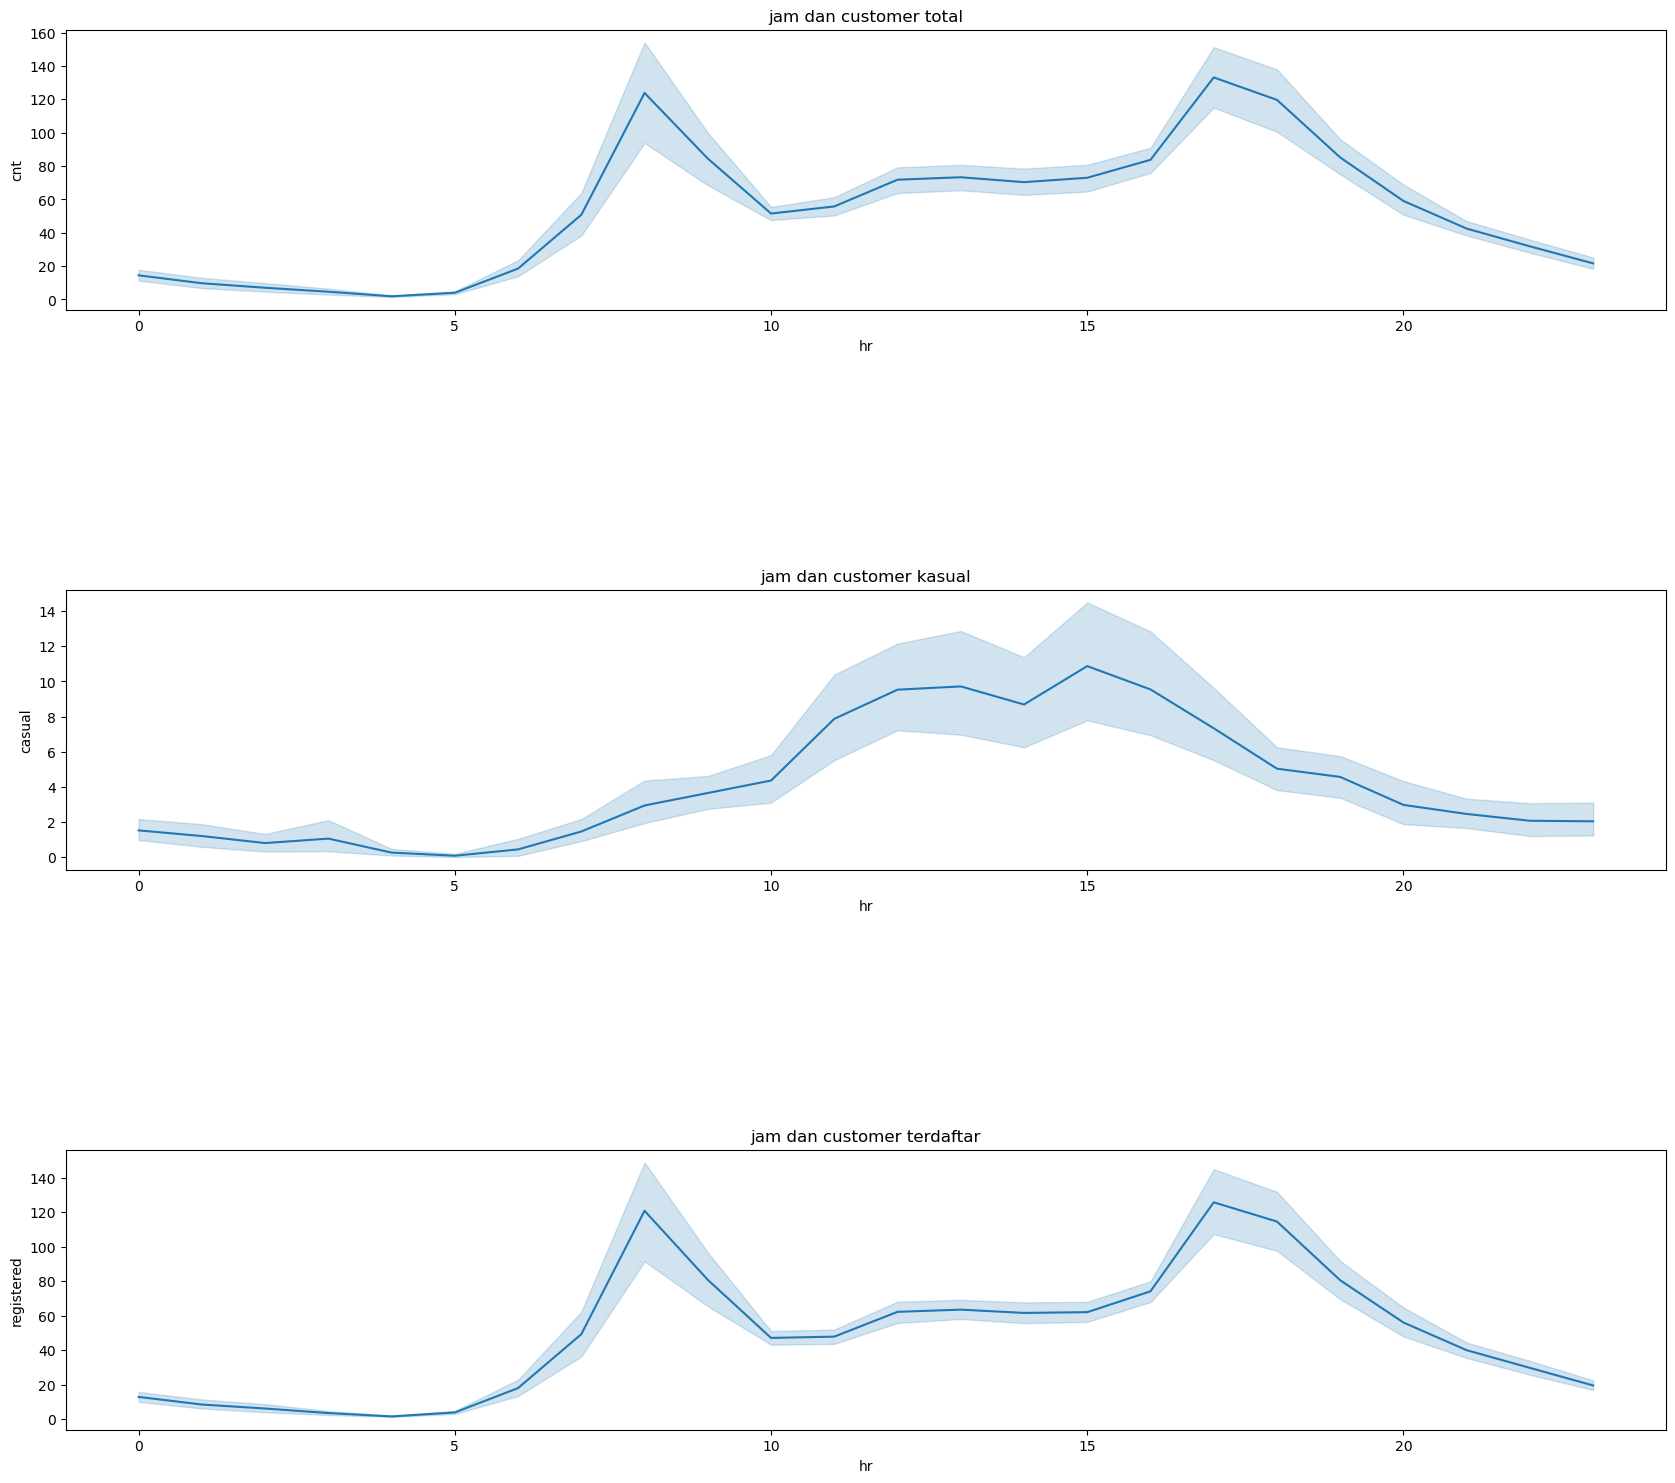

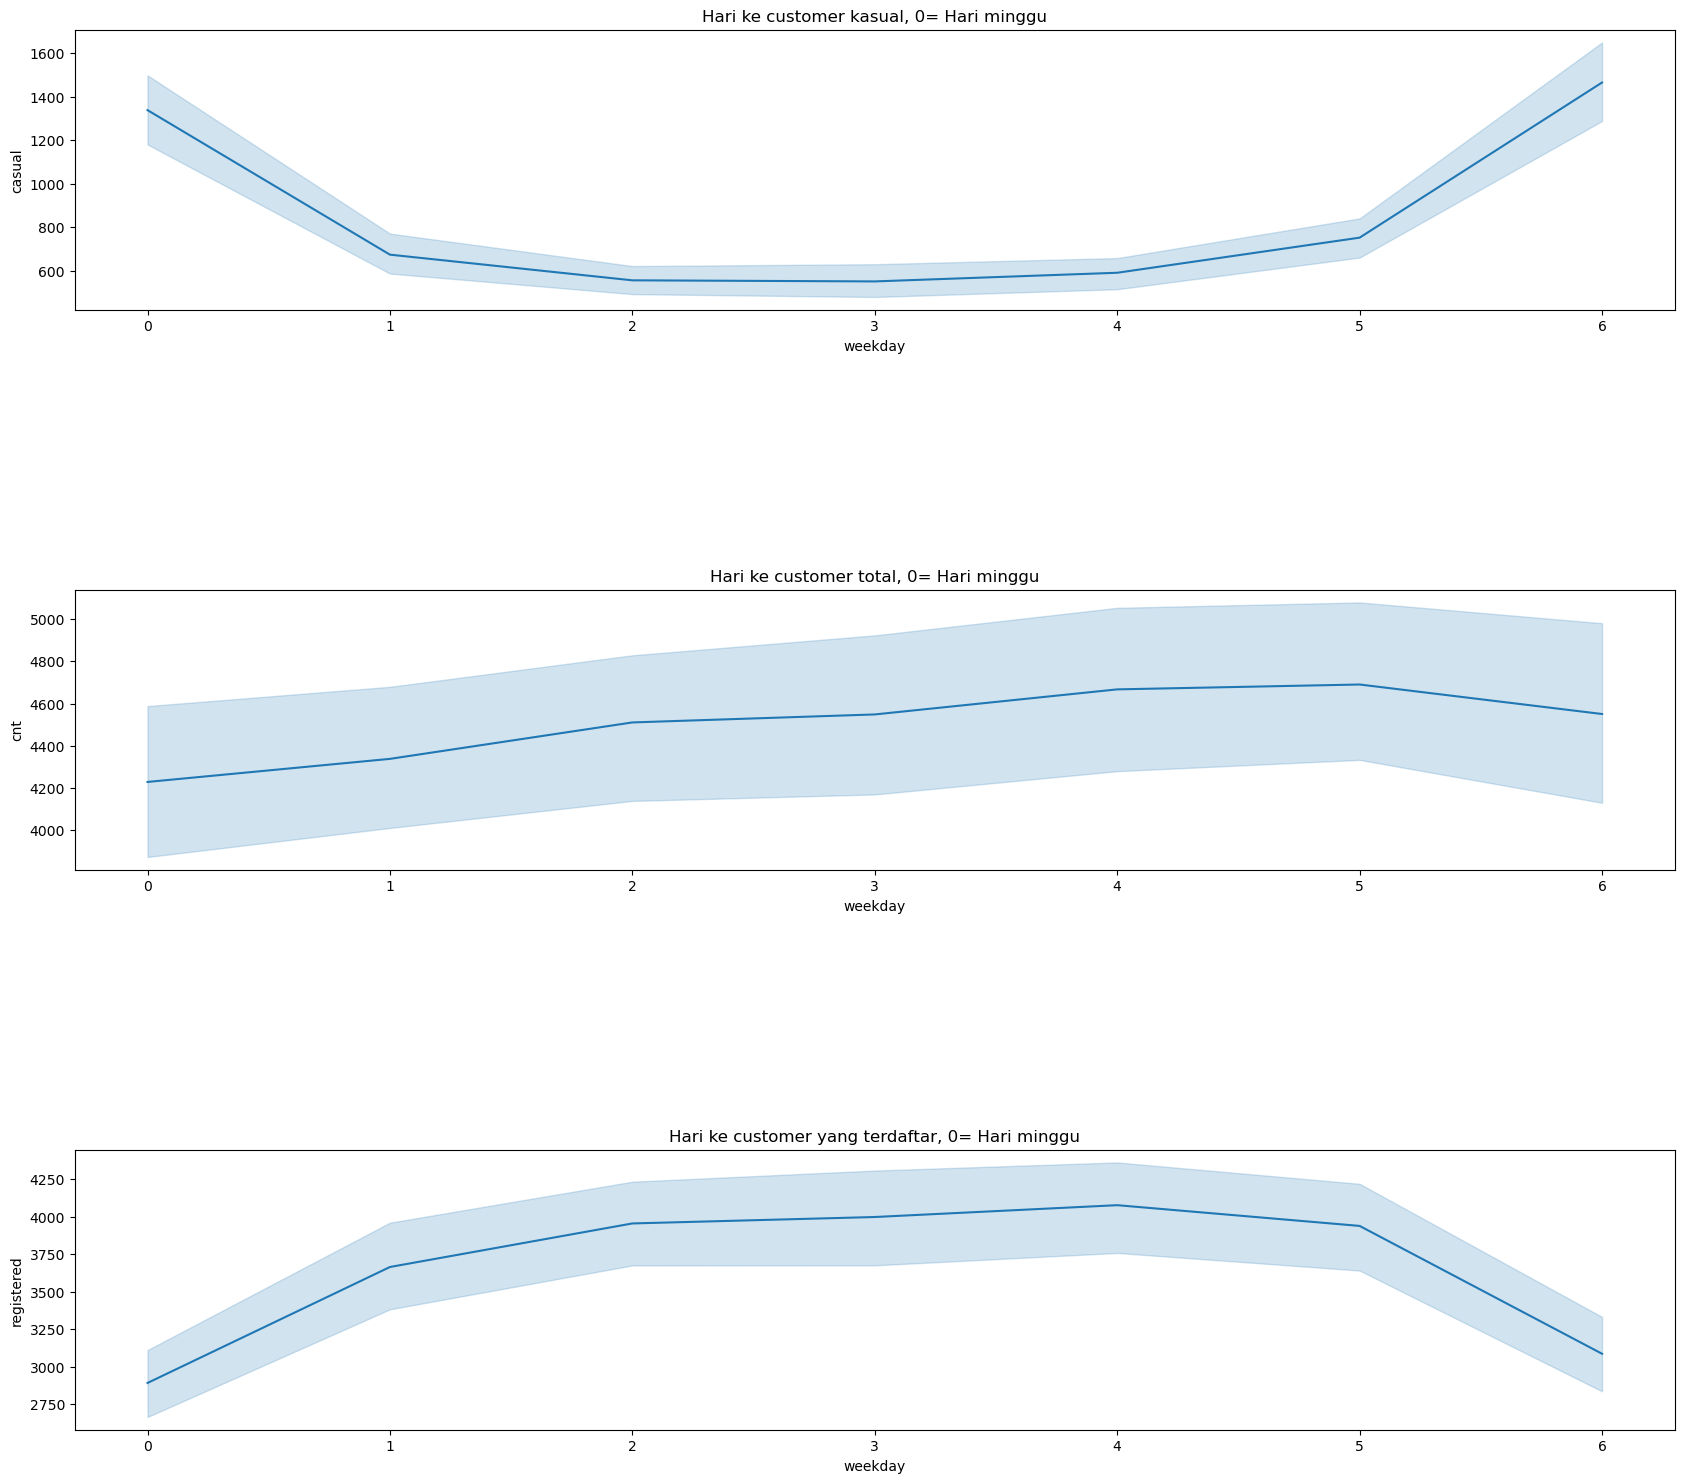

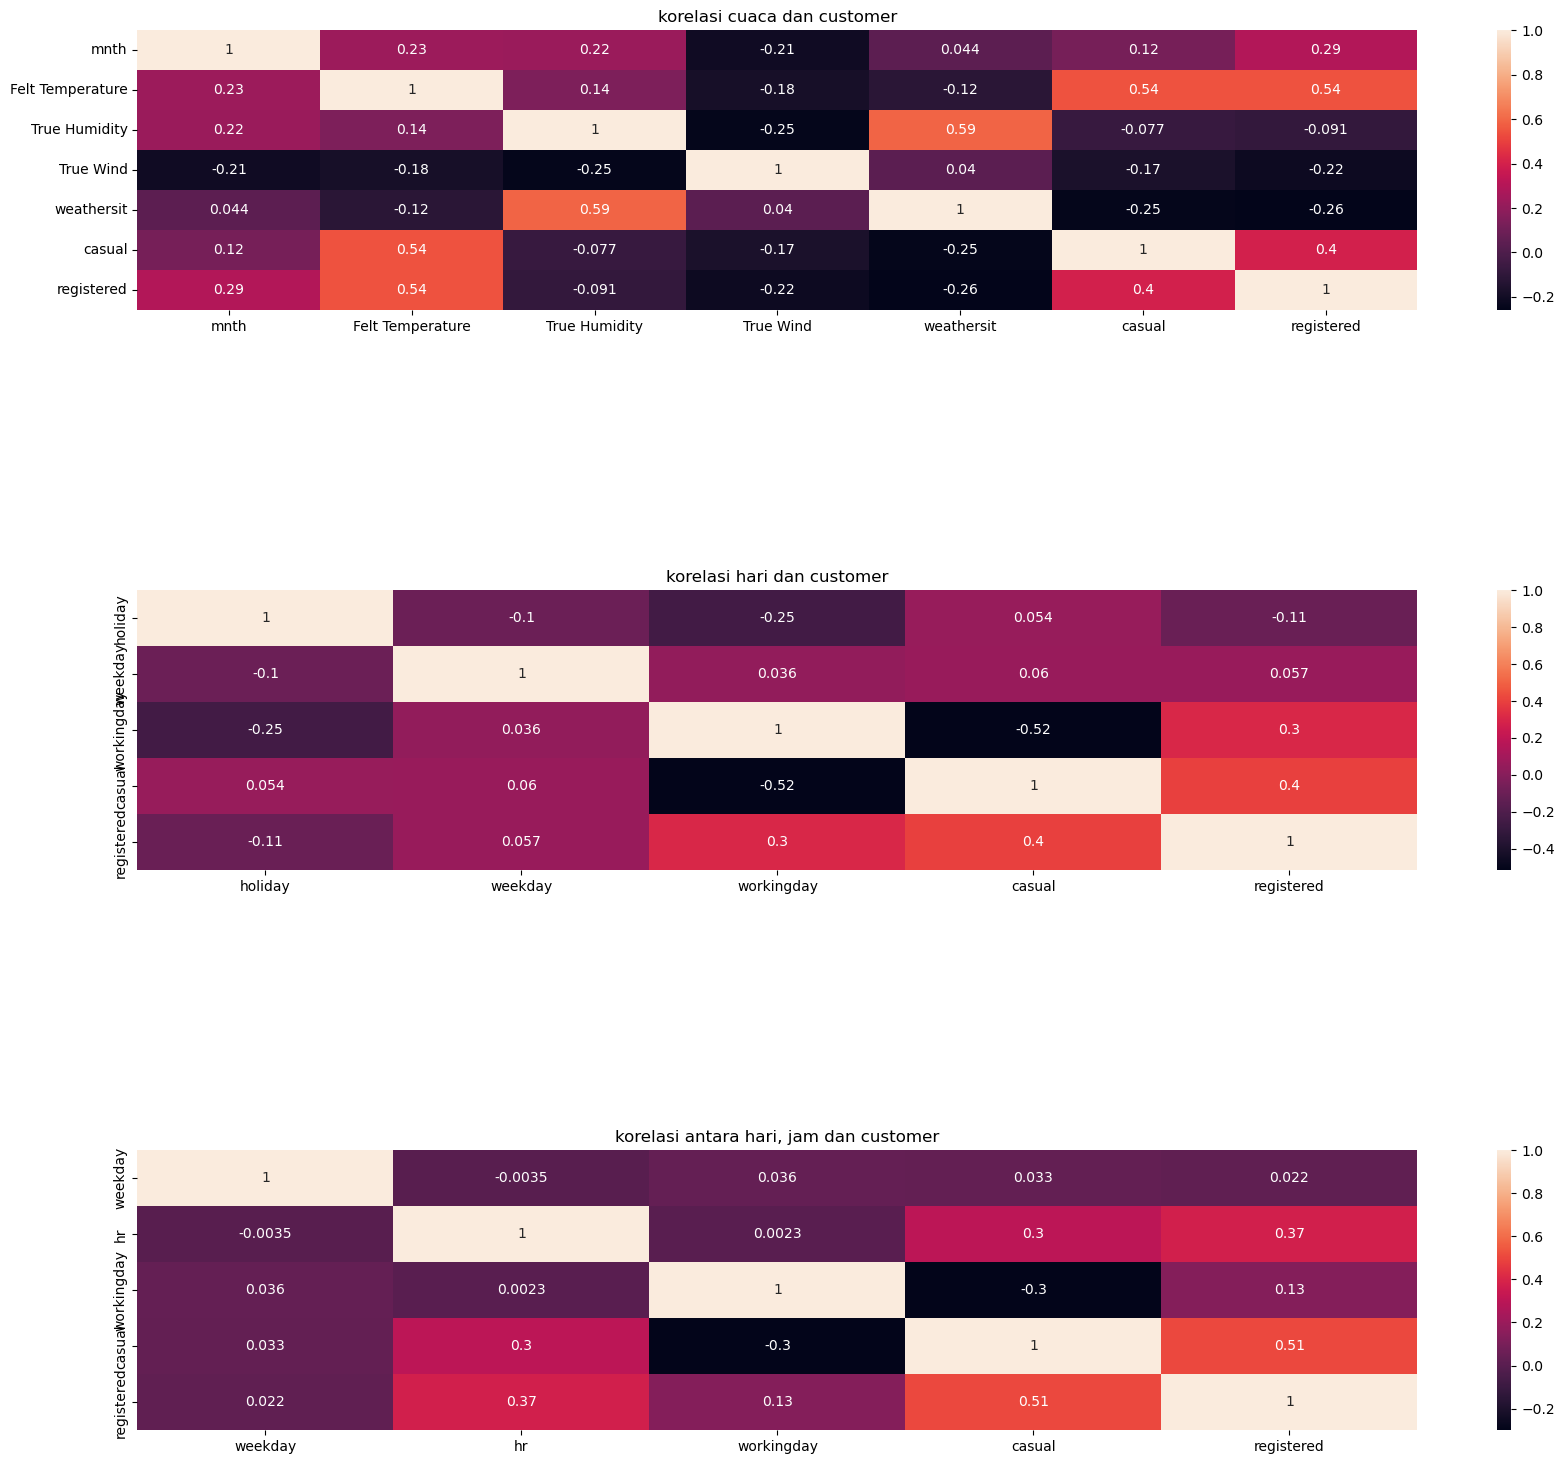

In [8]:
with tab2:
    st.header("Graf Perilaku Pelanggan")
    with st.container():
        st.subheader("Pelanggan Per Jam")
        #'plot data customer
        fig3, axes = plt.subplots(3, figsize=(20, 20))
        sns.lineplot(x="hr", y='cnt', ax=axes[0],data=hmain_df) #untuk hour --> customer
        axes[0].set_title('jam dan customer total')
    
        sns.lineplot(x="hr", y='casual', ax=axes[1],data=hmain_df) #untuk hour --> casual customer
        axes[1].set_title('jam dan customer kasual')
    
        sns.lineplot(x="hr", y='registered', ax=axes[2],data=hmain_df) #untuk hour --> registered customer
        axes[2].set_title('jam dan customer terdaftar')
        plt.subplots_adjust(left=0.1,
                            bottom=0.1, 
                            right=0.9, 
                            top=0.8, 
                            wspace=0.4, 
                            hspace=1)
        st.pyplot(fig3.get_figure())

    with st.container():
        st.subheader("Pelanggan Harian")
        fig4, axes = plt.subplots(3, figsize=(20, 20))
        sns.lineplot(x="weekday", y='casual', ax=axes[0],data=main_df) #untuk weekday --> casual customer
        axes[0].set_title('Hari ke customer kasual, 0= Hari minggu')
    
        sns.lineplot(x="weekday", y='cnt', ax=axes[1],data=main_df) #untuk weekday --> customer
        axes[1].set_title('Hari ke customer total, 0= Hari minggu')
    
        sns.lineplot(x="weekday", y='registered', ax=axes[2],data=main_df) #untuk weekday --> registered customer
        axes[2].set_title('Hari ke customer yang terdaftar, 0= Hari minggu')
        plt.subplots_adjust(left=0.1,
                            bottom=0.1, 
                            right=0.9, 
                            top=0.8, 
                            wspace=0.4, 
                            hspace=1)
        st.pyplot(fig4.get_figure())

    
    
with tab3:
    st.subheader("Tabel Korelasi dan Statistik Data")
    with st.container():
        col1, col2= st.columns([3.5, 1])
        with col1:
            
            #'memvisualisasikan data korelasi
            fig1, axes = plt.subplots(3, figsize=(20, 20))
        
            sns.heatmap(data=corrcuaca, ax=axes [0], annot=True)
            axes[0].set_title('korelasi cuaca dan customer')
        
            sns.heatmap(data=corrweekday, ax=axes[1], annot=True)
            axes[1].set_title('korelasi hari dan customer')
        
            sns.heatmap(data=corrday, ax=axes[2],annot=True) 
            axes[2].set_title('korelasi antara hari, jam dan customer')
            plt.subplots_adjust(left=0.1,
                                bottom=0.1, 
                                right=0.9, 
                                top=0.8, 
                                wspace=0.4, 
                                hspace=1)
            st.pyplot(fig1.get_figure())

        with col2:
            st.header("Catatan")
            st.write("Korelasi Positif= \n\n -Berbanding positif \n\n Korelasi Negatif= \n\n -Berbanding terbalik")
    with st.container():
        st.subheader("Statistik data Harian")
        st.dataframe(described)
        st.write("Count= Total Data, Mean= Rata-Rata data, Min= Nilai terendah, Max= Nilai tertinggi")
    with st.container():
        st.subheader("Statistik data per Jam")
        st.dataframe(hdescribed)
        st.write("Count= Total Data, Mean= Rata-Rata data, Min= Nilai terendah, Max= Nilai tertinggi")

plt.show()

**Insight:**
- Dapat dilihat di heatmap korelasi antara hari,jam dan customer, saat workingday pelanggan kasual berkurang karena nilai negatif
- Baik pelanggan registered dan casual naik saat sore hari dengan aktivitas terbanyak pelanggan kasual di jam 15.00 dan pelanggan registered di jam 17.00
- Mayoritas Pelanggan registered menggunakan sepeda saat hari kerja sedangkan pelanggan kasual pada hari libur
- Pelanggan paling banyak ada pada hari jum'at (hari 5 dalam dataset)
- Pelanggan registered paling aktif pada jam masuk kerja (jam 07.00-09.00) dan jam pulang kerja (jam 16.00-18.00)
- Suhu yang rendah, Kondisi cuaca buruk, kecepatan angin dan persen kelembapan yang tinggi membuat orang cenderung tidak mau bersepeda, diperlihatkan dari hasil heatmap korelasi dimana suhu berkorelasi positif, dengan cuaca, windpeed dan humidity berkorelasi negatif.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclusion pertanyaan 1:
- Ya, Cuaca berdampak terutama pada situasi cuaca, dimana saat hujan badai/ badai es pelanggan turun drastis
- Suhu yang rendah, Kondisi cuaca buruk, kecepatan angin dan persen kelembapan yang tinggi membuat orang cenderung tidak mau bersepeda
- Ternyata, suhu yang terasa berpengaruh positif membuat orang mau bersepeda.
- Menjelang akhir tahun, kecepatan angin menurun
-
- Conclusion pertanyaan 2:
- Untuk pengguna Casual, mereka lebih cenderung bersepeda pada hari libur (sabtu dan minggu/holiday) dan saat tengah hari sampai sore, sekitar jam 11.00-16.00
- Pengguna kasual cenderung tidak bersepeda saat hari kerja
- Untuk pengguna Registered, mereka lebih cenderung bersepeda pada hari kerja saat jam masuk kerja (jam 07.00-09.00) dan jam pulang kerja (jam 16.00-18.00)
- Pengguna Registered cenderung bersepada pada hari kerja, membuktikan bahwa mereka memilih bersepeda untuk ke tempat kerja
- Para pengguna baik registered atau casual paling banyak bersepeda di sore hari dari jam 16.00 sampai jam 18.00